# Part II - Analyze Users

## ➔ We need to segment existing customers based on their frequency and order value.
## ➔ Ordering Breakfast via efood is a quite new habit that Marketing thinks could create more loyal customers. Which segment could be a valuable target group for a Marketing campaign about “Breakfast” cuisine_parent?

First of all we need to import the data from the dataset. The tool used to build the code is google colab, so feel free to change the import method so you can run the notebook

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')
import pandas as pd 

df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/efood assessment/Assessment exercise dataset - orders.csv')
df

Mounted at /content/gdrive


,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.6
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.9
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.7
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.0
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.0
...,...,...,...,...,...,...,...
534265,7383295241752,314285338626,2022-01-28 22:25:04 UTC,Αλεξανδρούπολη,Street food,True,11.9
534266,7383425578320,586121418057,2022-01-28 22:39:29 UTC,Αλεξανδρούπολη,Street food,True,9.9
534267,7364485291992,29082002418,2022-01-24 19:29:34 UTC,Αλεξανδρούπολη,Street food,True,15.1
534268,7231345759480,348528607896,2022-01-05 18:28:41 UTC,Αλεξανδρούπολη,Street food,True,14.7


We can start with a quick overview of the data

In [2]:
df.describe()

,order_id,user_id,amount
count,5.342700e+05,5.342700e+05,534270.000000
mean,7.308039e+12,3.058014e+11,8.522366
std,5.903277e+10,2.077033e+11,6.095029
min,7.202715e+12,4.411892e+07,0.400000
25%,7.256096e+12,1.333362e+11,4.600000
50%,7.310697e+12,2.551308e+11,6.700000
75%,7.363637e+12,5.174219e+11,10.800000
max,7.404766e+12,6.855679e+11,204.800000


We now need to identify what makes the breakfast customers special, and find those customers that are the most valuable breakfast customers. For that reason, we select ony the breakfast orders from the original dataframe


In [3]:
breakfast = df[df['cuisine']=='Breakfast']
breakfast

,order_id,user_id,order_timestamp,city,cuisine,paid_cash,amount
0,7322173742136,94223136441,2022-01-18 15:41:28 UTC,Αίγιο,Breakfast,True,3.60
1,7210978616924,204794985423,2022-01-02 17:50:50 UTC,Αγρίνιο,Breakfast,True,1.90
2,7221232906132,12703920390,2022-01-04 08:37:12 UTC,Αγρίνιο,Breakfast,True,1.70
3,7399605199800,673310109528,2022-01-31 11:33:05 UTC,Λιβαδειά,Breakfast,True,3.00
4,7264221279744,673310109528,2022-01-10 11:18:28 UTC,Λιβαδειά,Breakfast,True,3.00
...,...,...,...,...,...,...,...
207958,7263840786692,169008847728,2022-01-10 10:07:51 UTC,Ρόδος,Breakfast,False,5.20
207959,7400785395384,204555630573,2022-01-31 14:43:05 UTC,Ρόδος,Breakfast,False,6.65
207960,7375063674700,311089886688,2022-01-27 17:16:07 UTC,Ρόδος,Breakfast,True,4.60
207961,7211036589604,210899698527,2022-01-02 17:59:55 UTC,Λέρος,Breakfast,False,2.00


We need to group all the orders by customer, and sum the total amount of their orders, while counting the times they have placed an order, thus finding the frequency

In [4]:
group = breakfast.groupby('user_id').agg({'amount': 'sum', 'user_id': 'count'})

We will proceed to cluster those customers using the K-Means algorithm. The clustering factors will be the amount of their orders, and the frequency, before clustering, the elbow method will be used to identify the ideal amount of clusters to use.

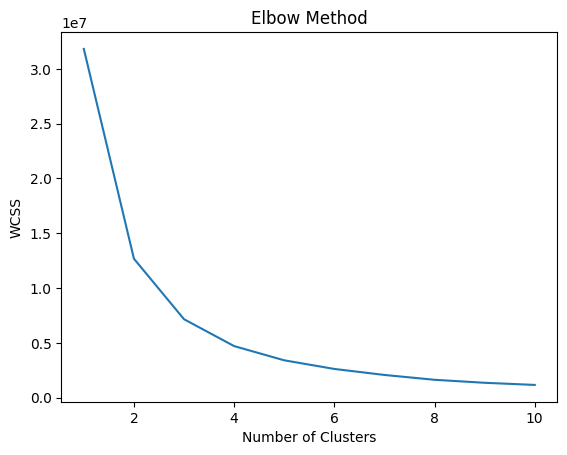

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(group)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

According to the elbow method, 3 clusters is the best amount of clusters for this dataset. Next we proceed to apply K-Means algorithm

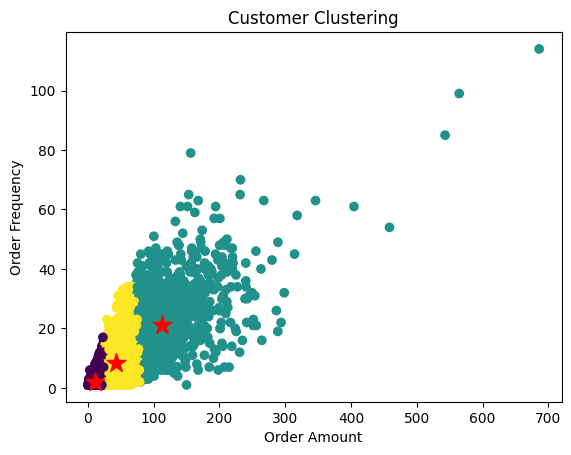

In [6]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(group)


plt.scatter(group['amount'], group['user_id'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=200, c='r')
plt.title('Customer Clustering')
plt.ylabel('Order Frequency')
plt.xlabel('Order Amount')
plt.show()

Clustering seems to be successful, but as we can see on the graph, the groups are formed only based on the order amount. We would prefer both factors to contribute to the formation of the clusters. The reason for this clustering may be that the values are on different scale. Next we proceed to normalise the variables, both in scale [0-1]

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(group)
breakfast_norm = pd.DataFrame(scaled, columns=group.columns, index=group.index)



In [8]:
breakfast_norm

,amount,user_id
user_id,,
110361993,0.005543,0.000000
144777339,0.087965,0.115044
145424244,0.016630,0.000000
153963390,0.012400,0.000000
155515962,0.007294,0.000000
...,...,...
685517465640,0.002188,0.000000
685519276974,0.007148,0.000000
685526134167,0.008169,0.000000


We repeat the elbow method, to confirm the number of clusters to use

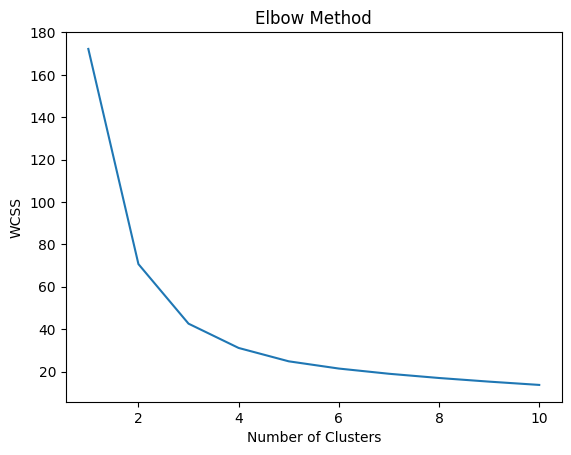

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(breakfast_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

We repeat the use of K-Mean algorith in the normalised data. This time it looks like the clustering is made considering both variables. The customers are divided into 3 groups, one for low frequency and amount, one for medium and one for high. 

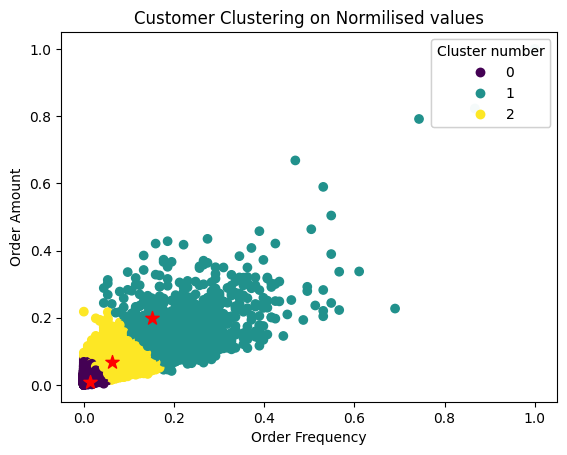

In [10]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(breakfast_norm)

clusters = kmeans.predict(breakfast_norm)
scatter = plt.scatter(breakfast_norm['user_id'],breakfast_norm['amount'], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=100, c='r')

plt.title('Customer Clustering on Normilised values')
plt.xlabel('Order Frequency')
plt.ylabel('Order Amount')
legend = plt.legend(*scatter.legend_elements(), loc="upper right", title="Cluster number")
plt.gca().add_artist(legend)

plt.show()

We assign the cluster numbers to the corresponding customers and we store the highest valued customers in a different dataset

In [11]:
breakfast_norm['cluster'] = clusters
top_breakfast=breakfast_norm[breakfast_norm['cluster']==1]
top_breakfast

,amount,user_id,cluster
user_id,,,
1113582267,0.129540,0.132743,1
1292645571,0.152006,0.115044,1
2942123940,0.232823,0.336283,1
4065280401,0.127586,0.132743,1
6122567682,0.221882,0.176991,1
...,...,...,...
677827317762,0.120350,0.238938,1
679076879460,0.133625,0.168142,1
679406412867,0.108242,0.194690,1


In this step, we assign the clustering results to the original dataset, and in addition we assign the indication "Not Breakfast Customers" to those who have never ordered breakfast. Meanwhile the data is grouped again by customer, counting the frequency and calculating the total amount, this time for all the oreders they have placed, and not just the breakfast orders.

In [12]:
customers=df[['amount', 'user_id', 'cuisine', 'order_timestamp']]
group_customers = customers.groupby('user_id').agg({'amount': 'sum', 'user_id': 'count'})
group_customers=group_customers.rename(columns={'user_id': 'frequency'})
group_customers['user_id'] = group_customers.index
group_customers=group_customers.reset_index(drop=True)
group_customers['breakfast_cluster'] = pd.merge(group_customers, breakfast_norm, left_on='user_id', right_index=True, how='left')['cluster'].fillna(3)
group_customers['breakfast_cluster'].replace({1.0: 'Low-value Breakfast customers', 0.0: 'Medium value Breakfast customers', 2.0: 'High value Breakfast customers', 3.0: 'Not Breakfast customers'}, inplace=True)
group_customers

,amount,frequency,user_id,breakfast_cluster
0,33.3,1,44118921,Not Breakfast customers
1,44.2,3,108938802,Not Breakfast customers
2,137.0,11,110361993,Medium value Breakfast customers
3,5.5,1,138437670,Not Breakfast customers
4,60.8,14,144777339,High value Breakfast customers
...,...,...,...,...
121938,6.8,1,685557444369,Not Breakfast customers
121939,8.7,1,685561325799,Not Breakfast customers
121940,7.2,1,685561843323,Not Breakfast customers
121941,11.5,1,685566242277,Medium value Breakfast customers


We proceed to scatterplot our data, adding the reggression line of each group. The 4 groups are the 3 breakfast clusters, and the additional group of customers who never ordered breakfast. The frequency and the amount calculated are the values based on all the orders they have placed, not only breakfast orders.

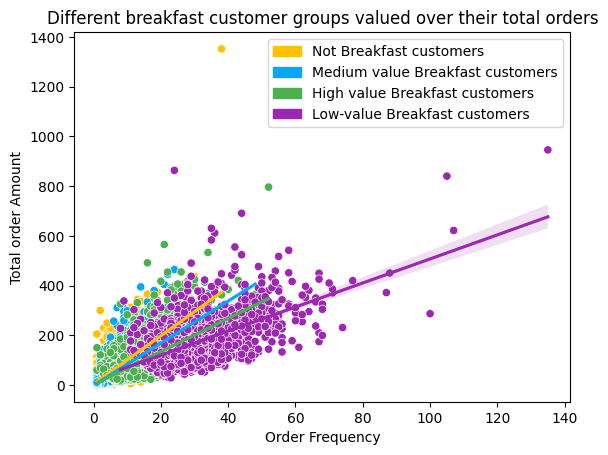

In [13]:
import matplotlib.patches as mpatches
import seaborn as sns


colors = ['#FFC107', '#03A9F4', '#4CAF50', '#9C27B0']
cluster_values = group_customers['breakfast_cluster'].unique()
fig, ax = plt.subplots()

for i, cluster in enumerate(cluster_values):
    subset = group_customers[group_customers['breakfast_cluster'] == cluster]
    sns.regplot(data=subset, x='frequency', y='amount', scatter=False, color=colors[i], ax=ax)
    sns.scatterplot(data=subset, x='frequency', y='amount',  hue=group_customers['breakfast_cluster'], palette=colors, ax=ax)
    

legend_labels = [mpatches.Patch(color=colors[i], label=cluster_values[i]) for i in range(len(cluster_values))]
ax.legend(handles=legend_labels)
ax.set_title("Different breakfast customer groups valued over their total orders")
plt.xlabel("Order Frequency")
plt.ylabel("Total order Amount")
plt.show()

The useful insight this graph reveals, is that the most valuable breakfast customers are also the most valuable customers in general, as they tend to be more loyal customers, placing orders more frequenlty. Additionally they seem to contribute with a little less amount, but the difference is not significant and can be explained by the fact that in general, breakfast is not as expensive as the other cuisines. 

Nevertheless, this way we can confirm that breakfast can create more loyal customers. Next we calculate how many of the customers have never ordered breakfast.

In [14]:
listed=group_customers[group_customers['breakfast_cluster']=='Not Breakfast customers']
listed=listed['user_id'].tolist()
len(listed)

66109

About 66.000 out of the 122.000 have never ordered breakfast. A good idea would be to target the breakfast campaign to customers that havent ordered breakfast yet, trying to enhance their loyalty. Next we will perform RFM Analysis on those customers.

In this step get the data needed, only for customers with 0 breakfast orders

In [15]:
target=df[['amount', 'user_id', 'order_timestamp']]
target=target[target['user_id'].isin(listed)]
target

,amount,user_id,order_timestamp
207967,8.5,130197264729,2022-01-23 23:01:02 UTC
207970,8.5,113962278087,2022-01-23 22:57:35 UTC
207976,8.5,658878694026,2022-01-23 22:30:51 UTC
207977,7.0,299650406811,2022-01-26 21:03:05 UTC
207981,7.5,509571984978,2022-01-25 19:59:56 UTC
...,...,...,...
534264,18.7,44479893990,2022-01-29 16:03:48 UTC
534265,11.9,314285338626,2022-01-28 22:25:04 UTC
534266,9.9,586121418057,2022-01-28 22:39:29 UTC
534267,15.1,29082002418,2022-01-24 19:29:34 UTC


Trying to calculate the values of Recency, Frequency and Monetary Value

In [16]:
from datetime import datetime
import pytz
target['order_timestamp'] = pd.to_datetime(target['order_timestamp'])
utc = pytz.utc
current_time = datetime.now(tz=utc)
target['recency'] = current_time - target['order_timestamp']

In [17]:
target_grouped=target.groupby('user_id').agg({'amount': 'sum', 'user_id': 'count', 'recency':'min'})
target_grouped = target_grouped.rename(columns={'amount': 'Monetary_Value', 'user_id':'Frequency', 'recency':'Recency'})
target_grouped['Recency'] = target_grouped['Recency'].dt.days
target_grouped

,Monetary_Value,Frequency,Recency
user_id,,,
44118921,33.3,1,459
108938802,44.2,3,437
138437670,5.5,1,436
167289633,17.0,2,437
188378736,63.2,4,443
...,...,...,...
685557314988,6.2,1,433
685557444369,6.8,1,433
685561325799,8.7,1,433


We proceed with RFM analysis, starting with setting the percentiles, and distributing the values accordingly. In the end, the RFM score is calculated

In [21]:
rfm_features = ['Recency', 'Frequency', 'Monetary_Value']
quartiles = target_grouped[rfm_features].quantile(q=[0.25, 0.5, 0.75]).to_dict()

def rfm_score(x, feature, quartiles):
    if x <= quartiles[feature][0.25]:
        return 4
    elif x <= quartiles[feature][0.5]:
        return 3
    elif x <= quartiles[feature][0.75]:
        return 2
    else:
        return 1
target_grouped['R'] = target_grouped['Recency'].apply(rfm_score, args=('Recency', quartiles))
target_grouped['F'] = target_grouped['Frequency'].apply(rfm_score, args=('Frequency', quartiles))
target_grouped['M'] = target_grouped['Monetary_Value'].apply(rfm_score, args=('Monetary_Value', quartiles))
target_grouped['RFM Score'] = target_grouped['R'].map(str) + target_grouped['F'].map(str) + target_grouped['M'].map(str)


target_grouped

,Monetary_Value,Frequency,Recency,R,F,M,RFM Score
user_id,,,,,,,
188378736,63.2,4,443,1,4,2,142
433038207,95.3,5,433,4,3,1,431
435884589,78.1,4,449,1,4,2,142
580532547,68.0,7,442,1,2,2,122
713924358,90.7,4,445,1,4,1,141
...,...,...,...,...,...,...,...
683762024232,39.9,4,433,4,4,4,444
683854790409,67.0,4,433,4,4,2,442
683895545424,48.1,4,435,3,4,3,343


Since the recency is not highly variant for this dataset, it is better to proceed only with the frequency and the monetary value of the targeted audience. We suggest to target the customers who have high loyalty and high amount, because the goal of this campaign is to increase loyal customers.

In [22]:
target_grouped=target_grouped[target_grouped['F']<=2]
target_grouped=target_grouped[target_grouped['M']<=2]
target_grouped

,Monetary_Value,Frequency,Recency,R,F,M,RFM Score
user_id,,,,,,,
580532547,68.0,7,442,1,2,2,122
986788887,213.4,9,439,1,1,1,111
2003335404,86.5,9,435,3,1,1,311
2034128082,89.9,9,435,3,1,1,311
2877692202,69.3,8,437,2,2,2,222
...,...,...,...,...,...,...,...
680803339524,85.2,10,434,4,1,1,411
681019664556,74.6,7,433,4,2,2,422
681264582789,114.0,12,433,4,1,1,411


Disclaimer: part of the code produced in this notebook is inspired by various resources, like web searches and projects I completed as part of my Master's Degree, but the basic ideas and the thought process is completely original.